<a href="https://colab.research.google.com/github/Huy-K62/Book/blob/master/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liên kết GoogleColab với GoogleDrive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Cơ sở lý thuyết**
1.   Image histogram
2.   Sliding Windows
3.   Convolution
4.   Image gradient



In [ ]:
1. Histogram trong xử lý ảnh
Histogram là biểu đồ thống kê tần suất xuất hiện của mức sáng.
Histogram equalization thường được dùng ở bước tiền xử lý nhằm giảm sự ảnh hưởng do (chói),thiếu ánh sáng (tối),...
Giải thuật:
  Thống kê histogram cho ảnh: H(i)
  Áp dụng hàm biến đổi: H'(i)
  Chuẩn hóa histogram mới vừa biến đổi về [0, 255].
Link tham khảo: 
https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html#how-does-it-work

In [ ]:
2. Sliding Windows
Window size (kernel size): kích thước cửa sổ.
Padding: số pixel mở rộng thêm vào ảnh đầu vô.
Stride: khoảng cách trượt.
Dilation: khoảng cách của mỗi pixel trên cửa sổ.
Tác dụng: 
  Biến đổi ảnh: làm mờ (blur), trích cạnh, …
  Trích xuất đặc trưng cục bộ (vùng cục bộ chính là vùng ảnh có kích thước bằng kích thước cửa sổ trượt).
Link tham khảo: https://minhng.info/tutorials/xu-ly-anh-opencv-cua-so-truot-sliding-window.html

In [ ]:
3. Convolution
Convolution (tích chập) là toán tử mà ta thực hiện xoay cửa sổ 180 độ 
(flip over, tức flip 2 lần lần lượt theo trục x và y) rồi sau đó áp dụng phép correlation (tương quan).
Ví dụ convolution 1D:
Data: [3 4 6 7 15 2 -3 4 -6]
Kernel: [-1 1 2]
Output: [4 7 4 27 29 -3 4] (không có padding)
Giải thích:
Xoay kernel 180 độ thành kernel': [2 1 -1]
Áp dụng correlation của cửa sổ [2 1 -1] lên data.
Correlation là toán tử mà ta áp dụng sliding window với phép biến đổi dot product (tích vô hướng) trên mỗi vùng ảnh.
Ví dụ correlation 1D:
Data: [3 4 6 7 15 2 -3 4 -6]
Kernel: [-1 1 2]
Output: [13 16 31 12 -19 3 -5] (không có padding)
Giải thích:
Output[0] = 3x(-1) + 4x1 + 6x2 = 13
Output[1] = 4x(-1) + 6x1 + 7x2 = 16
…
Output[6] = (-3)x(-1) + 4x1 + (-6)x2 = -5

In [ ]:
4. Image gradient (Đạo hàm ảnh)
Gradient ở đây chỉ độ dốc về mức sáng, hay nói cách khác là sự thay đổi các giá trị pixel trong ảnh.
VD: Vùng có giá trị pixel gần gần như nhau thì đạo hàm gần như = 0
Hai bộ lọc phổ biến để tính gradient của ảnh:
  Laplacian kernel (Laplacian của một hình ảnh làm nổi bật các vùng thay đổi cường độ nhanh chóng)
  => Link tham khảo: https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
  Sobel kernel
  => Link tham khảo: https://en.wikipedia.org/wiki/Sobel_operator
Tác dụng: Làm nổi rõ cạnh của hình ảnh

Xây dựng mô hình trainning


In [2]:
!ls "/content/gdrive/My Drive/"

'17 KT vi xu ly'
 BT_HTNhung_NguyenQuangHuy20172608.docx
'Cac thuat toan LMHoang(101 - 150).pdf'
'Cac thuat toan LMHoang(1-100).pdf'
 Classroom
'Colab Notebooks'
 Emu8086
 giao-trinh-thuat-toan-ly-thuyet-va-bai-tap-so-cap-trung-cap-cao-cap.pdf
 HOG.ipynb
 INRIAPerson
 iot-starter.pdf
 longbachkhoa_documents
 Microprocessor_ShareWithStudents
'Tài liệu không có tiêu đề.gdoc'
 Video_UAV


Đọc ảnh xám 

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #cv2.imread đọc ảnh, cv2.IMREAD_GRAYSCALE đọc ảnh xám
img = cv2.resize(src=img, dsize=(64, 128)) # thay đổi kích thước ảnh (WxH)(64x128)

**Tính gradient của ảnh**
=> 
Dùng filter 1D (-1, 0, 1) để convolution tính ảnh đạo hàm theo trục x, và **chuyển vị** của filter trên để tính ảnh đạo hàm theo trục y.

Mỗi điểm ảnh là sự kết hợp của 3 hay 4 kênh màu và tùy vào hệ màu. Hệ màu được sử dụng phổ biến là RGB. Mỗi kênh màu được lưu trữ bởi n bits. Vậy, với ảnh màu có 3 kênh màu gồm: R - Red, G - Green, B - Blue; thì số lượng bits để biễu diễn mỗi điểm ảnh là 3n bits và số lượng màu mà điểm ảnh này có thể hiển thị là 2^(3n).

In [ ]:
xkernel = np.array([[-1, 0, 1]]) # 
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel) # cv2.filter2D nhân convolution ma trận ảnh với kernel
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)  # cv2.CV_32F cấu trúc Float 32 bits cho việc lưu trữ hình ảnh

**Biểu đồ Gradients định hướng (HOG)**
=> trích xuất các tính năng ra khỏi màu pixel để xây dựng bộ phân loại nhận dạng đối tượng

Với Dx và Dy là 2 xkernel và ykernel bên trên


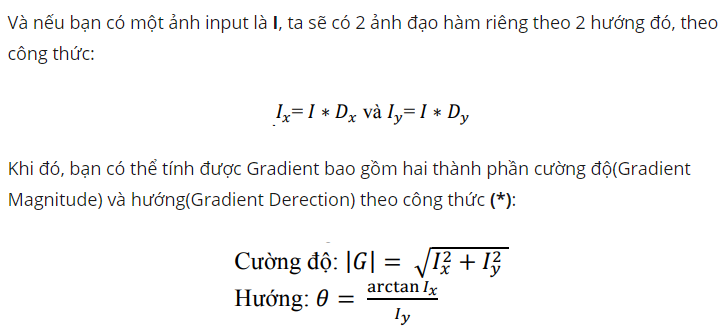

Tính toán vector gradient của mọi pixel, cũng như độ lớn và hướng của nó.
Tác dụng làm nổi rõ cạnh để mô tả các đối tượng cục bộ trong ảnh, ví dụ:

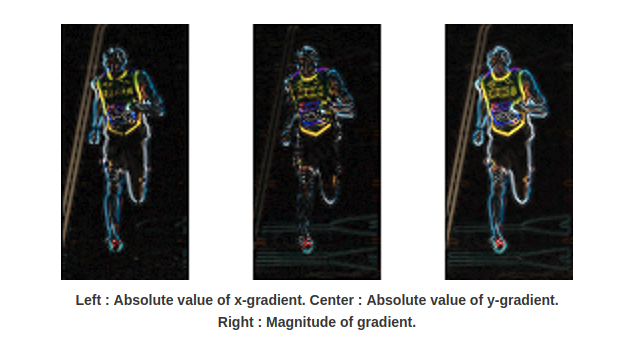

Chia hình ảnh thành nhiều ô (cell) 8x8 pixel (tác giả có tùy chỉnh và chọn 8 là giá trị hợp lý qua các thí nghiệm). Trong mỗi ô, ta có 64 giá trị hướng và 64 giá trị biên độ, chia các hướng vào 9 nhóm (bins) không có dấu (do đó 0-180 độ thay vì 0-360 độ - đây là lựa chọn thực tế dựa trên các thí nghiệm thực nghiệm) - chia như vậy để xác định hướng

In [ ]:
# histogram
magnitude = np.sqrt(np.square(dx) + np.square(dy)) # Độ lớn 
orientation = np.arctan(np.divide(dy, dx+0.00001)) # radian - hướng 
orientation = np.degrees(orientation) # -90 -> 90 đổi radian sang độ
orientation += 90 # 0 -> 180 

#Bức ảnh có kích thước 64*128 => có 128 cell với cell_size = 8
num_cell_x = w // cell_size # 64/8 = 8 toán tử // là chia làm tròn xuống 
num_cell_y = h // cell_size # 128/8 = 16
hist_tensor = np.zeros([num_cell_y, num_cell_x, bins]) # 16 x 8 x 9 Tạo một numpy array
for cx in range(num_cell_x):
    for cy in range(num_cell_y):
        #(cx*cell_size,cy*cell_size) xác định góc trên cùng bên trái của ô đích
        #ví dụ hướng và độ lớn ở cell có góc trên cùng bên trái nằm ở vị trí [100,100] trong bức ảnh
        #thì cx*cell_size = 100, cy*cell_size = 100 mình nghĩ là như vậy, các c tìm hiểu thêm
        ori = orientation[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
        mag = magnitude[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
        # xác định Histogram
        hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag) # 1-D vector, 9 elements
        hist_tensor[cy, cx, :] = hist
    pass
pass

Tại mỗi cell, xây dựng một biểu đồ cường độ gradient

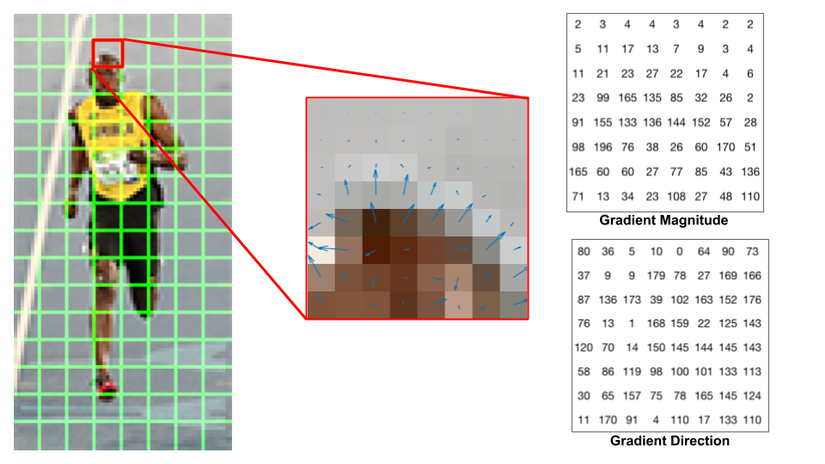

Đầu tiên là pixel có bao quanh màu xanh lam. Nó có hướng 80 độ và cường độ là 2, vì vậy ta thêm 2 vào bin thứ 5 (hướng 80 độ). Tiếp theo là pixel có bao quanh màu đỏ. Nó có hướng 10 độ và cường độ 4. Vì không có bin 10 độ, nên ta vote cho bin 0 độ và 20 độ, mỗi bin thêm 2 đơn vị. Tuy nhiên trong bài của nhóm ta, việc chia góc rõ ràng hơn, ví dụ từ 0-20 độ thì rơi vào bin 0, không có chuyện vote vào 2 bên, mình lấy ví dụ này để mọi người dễ hình dung hơn thôi

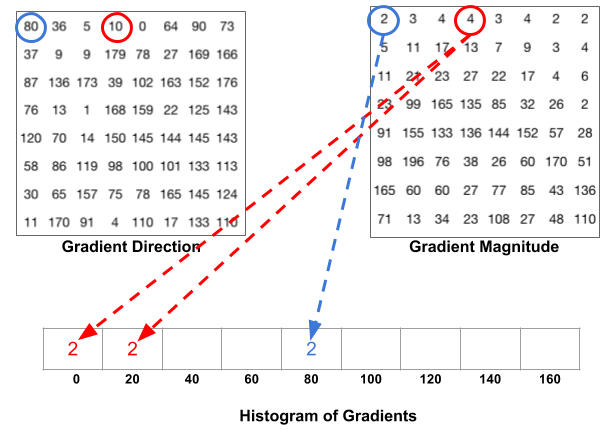

***Kết quả ***


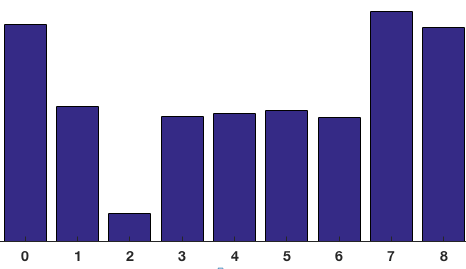

**Chuẩn hóa theo blocks**

Để tăng cường hiệu năng nhận dạng, các histogram cục bộ sẽ được chuẩn hóa về độ tương phản bằng cách tính một ngưỡng cường độ trong một khối(block) và sử dụng giá trị đó để chuẩn hóa tất cả các ô(cell) trong khối. Kết quả sau bước chuẩn hóa sẽ là một vector đặc trưng có tính bất biến cao hơn đối với các thay đổi về điều kiện ánh sáng

Một block gồm nhiều cell, block 2x2 nghĩa là ta có vùng diện tích của 4 cell liền kề –> block này sẽ phủ trên diện tích = 16x16 pixel. Trong quá trình chuẩn hóa, ta sẽ lần lượt chuẩn hóa block 2x2 đầu tiên, rồi dịch block đó sang 1 cell và cũng thực hiện chuẩn hóa cho block này

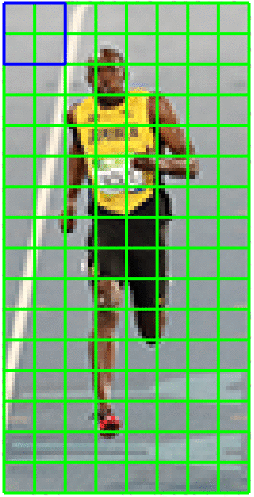

Lấy tất cả vector của 4 cell trong block đang xét nối lại với nhau thành vector v. Vector v có 9 x 4 = 36 phần tử. Sau đó ta chuẩn hóa (tính toán lại vector v) theo công thức sau với e là một hằng số nhỏ:

l2-norm.png

In [ ]:
# normalization
redundant_cell = block_size-1 # block (2x2) => vùng diện tích của 4 cell liền kề, tạm đặt block_size = 2
#redundant_cell = 2-1 =1
feature_tensor = np.zeros([num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins])
#feature_tensor = np.zeros([15,7,36])
for bx in range(num_cell_x-redundant_cell): # 8-1=7
    for by in range(num_cell_y-redundant_cell): # 16-1=15
        by_from = by
        by_to = by+block_size
        bx_from = bx
        bx_to = bx+block_size
        #tính lại v theo L2-norm phía trên, gán v sau khi tính lại = feature_tensor
        v = hist_tensor[by_from:by_to, bx_from:bx_to, :].flatten() # to 1D array (vector), trải thẳng mảng v ra thành mảng 1 chiều
        feature_tensor[by, bx, :] = v / LA.norm(v, 2)
        #Đọc link dưới đay để hiểu về LA.norm
        #https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

**Tính toán vector đặc trưng HOG**

1.   Với mỗi hình ảnh kích thước 64x128, chia thành các block 16x16 chồng nhau, sẽ có 7 block ngang và 15 block dọc, nên sẽ có 7x15 = 105 blocks.
2.   Mỗi block gồm 4 cell. Khi áp dụng biểu đồ 9-bin cho mỗi cell, mỗi block sẽ được đại diện bởi một vector có kích thước 36x1.
3.   Vì vậy, khi nối tất cả các vector trong một block lại với nhau, ta sẽ thu được vector đặc trưng HOG của ảnh có kích thước 105x36x1 = 3780x1.

In [ ]:
return feature_tensor.flatten() # 3780 features
#Phép toán flatten trên tensor định hình lại tensor để có hình dạng bằng số phần tử có trong tensor
#Đây là điều tương tự như một mảng 1d của các phần tử.

Trên đây là toàn bộ phần thuật toán HOG, tiếp theo mình sẽ ghép code để xây dựng mô hình

In [ ]:
#import các thư viện cần thiết và khai báo các đường dẫn
import os
import random
import cv2
import numpy as np
from numpy import linalg as LA
from PIL import Image
from sklearn import svm
import joblib # save / load model

"""
# Download INRIAPerson dataset:
$ wget ftp://ftp.inrialpes.fr/pub/lear/douze/data/INRIAPerson.tar
$ tar -xf INRIAPerson.tar
"""

TRAIN_POS_LST = 'INRIAPerson/train_64x128_H96/pos.lst'
TRAIN_POS_DIR = 'INRIAPerson/96X160H96/Train'

TRAIN_NEG_NUM_PATCHES_PER_IMAGE = 10
TRAIN_NEG_LST = 'INRIAPerson/train_64x128_H96/Train/neg.lst'
TRAIN_NEG_DIR = 'INRIAPerson/train_64x128_H96/Train'

TRAIN_NEG_PATCH_SIZE_RANGE = (0.4, 1.0)

In [ ]:
#nội dung hàm này là toàn bộ phần thuật toán HOG
def hog(img_gray, cell_size=8, block_size=2, bins=9)

In [ ]:
def read_image_with_pillow(img_path, is_gray=True):
    pil_im = Image.open(img_path).convert('RGB')
    img = np.array(pil_im) 
    img = img[:, :, ::-1].copy()  # Convert RGB to BGR 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
# Do ảnh trong tập dữ liệu này đã quá lâu đời và mình đã thử OpenCV không đọc được ảnh png của nó. 
#Do đó tác giả phải dùng PILLOW để đọc và convert sang cấu trúc Numpy để tiếp tục xử lý bằng OpenCV

In [ ]:
negative_patches = []
for num_neg_idx in range(train_neg_num_patches_per_image):
    random_patch_size = random.uniform(train_neg_patch_size_range[0], train_neg_patch_size_range[1])
    random_patch_height = int(random_patch_size*img_min_size)
    random_patch_width = int(random_patch_height * random.uniform(0.3, 0.7))
    random_position_x = random.randint(0, img_w-random_patch_width)
    random_position_y = random.randint(0, img_h-random_patch_height)
    # crop image -> image patch
    npatch = img[random_position_y:random_position_y+random_patch_height, random_position_x:random_position_x+random_patch_width]
    negative_patches.append(npatch)
#Giải thuật random crop do tác giả tự viết
#ý tưởng như sau: random ngẫu nhiên kích thước patch ảnh
#chọn vị trí (x, y) ngẫu nhiên trên ảnh sau đó crop ra và lưu vào danh sách

In [ ]:
 with open(train_pos_lst) as f:
        pos_lines = f.readlines()
    
    positive_features = []
    pos_lines = [os.path.join(train_pos_dir, '/'.join(pl.split('/')[1:])).strip() for pl in pos_lines]
    for idx, pline in enumerate(pos_lines):
        img_path = pline
        if not os.path.isfile(img_path):
            print('[pos] Skipped %s' % img_path)
            continue
        img = read_image_with_pillow(img_path, is_gray=True)
        img = cv2.resize(src=img, dsize=(64, 128))
        f = hog(img)
        positive_features.append(f)
        print('[pos][%d/%d] Done HOG feature extraction @ %s' % (idx+1, len(pos_lines), img_path))
        
    positive_features = np.array(positive_features)
#Lần lượt duyệt các ảnh người trong tập positive theo file groundtruth
#Đọc ảnh positive, do ảnh này đã crop sẵn chỉ chứa đối tượng người nên ta tiến hành rút trích đặc trưng HOG luôn
#Trích đặc trưng mỗi ảnh ta tiến hành lưu trữ lại vector 3780 chiều đó
#Sau khi "xử" hết tập positive ta sẽ thu thập được một ma trận có kích thước 2416 x 3780
#Mỗi dòng trong ma trận này là vector đặc trưng của mỗi mẫu dương. 
#2416 chính là số mẫu dương trong danh sách huấn luyện.

In [ ]:
#Đọc ảnh negative, tính chất của tập mẫu âm này chính là hoàn toàn không có người.
#Ta sẽ crop trên ảnh này một cách ngẫu nhiên để làm mẫu âm (tức ảnh không có người). 
#Mỗi ảnh negative ta crop ngẫu nhiên 10 mẫu âm.
#Trích đặc trưng trên các mẫu ảnh âm này và lưu trữ chúng lại
#Sau khi "xử" hết tập negative ta sẽ thu được ma trận có kích thước 12180 x 3780
with open(train_neg_lst) as f:
        neg_lines = f.readlines()
    
    negative_features = []
    neg_lines = [os.path.join(train_neg_dir, '/'.join(pl.split('/')[1:])).strip() for pl in neg_lines]
    for idx, nline in enumerate(neg_lines):
        img_path = nline
        if not os.path.isfile(img_path):
            print('[neg] Skipped %s' % img_path)
            continue
        img = read_image_with_pillow(img_path, is_gray=True)
        img_h, img_w = img.shape
        img_min_size = min(img_h, img_w)

In [ ]:
x = np.concatenate((negative_features, positive_features), axis=0) # (14596, 3730)
y = np.array([0]*negative_features.shape[0] + [1]*positive_features.shape[0])
model = svm.SVC(C=0.01, kernel='rbf', probability=True) # <= probability=True: kết quả dự đoán sẽ cho ta các giá trị độ tin cậy (xác suất)
model = model.fit(x, y)
#nối hai ma trận của dữ liệu negative và positive lại thành một ma trận
#có kích thước 14596 x 3780 chứa dữ liệu huấn luyện
#Train mô hình học máy SVM dùng thư viện scikit-learn
#Link tham khảo SVM: https://machinelearningcoban.com/2017/04/09/smv/

**Vậy là hoàn thành việc xây dựng model**